In [26]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import imblearn
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# EDA

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.shape

(8425, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
#Checking for missing values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here we can see that most of the columns have null/missing values

<AxesSubplot:>

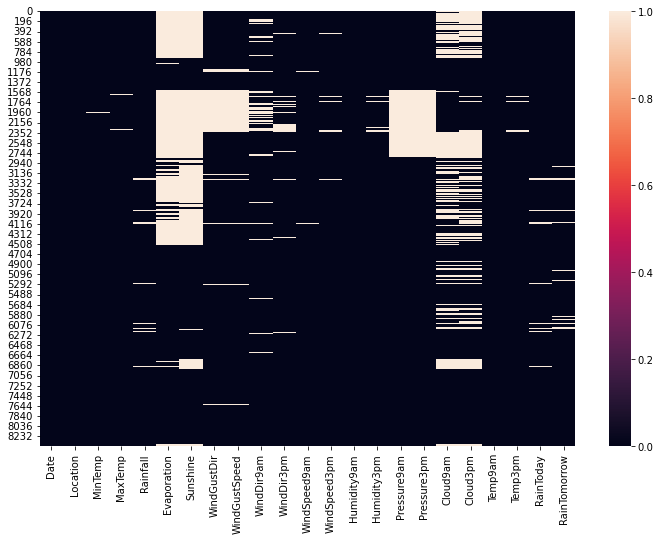

In [9]:
#Visualizeing null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

Clearly visible that so many values are missing

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
#Separating the features
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [12]:
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
cont_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

([<matplotlib.patches.Wedge at 0x1f2175b6fa0>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

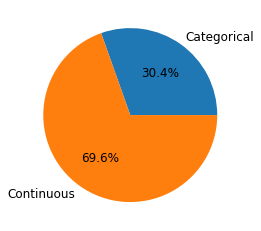

In [14]:
#Plottig with pie chart
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

# Target variables

In [15]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

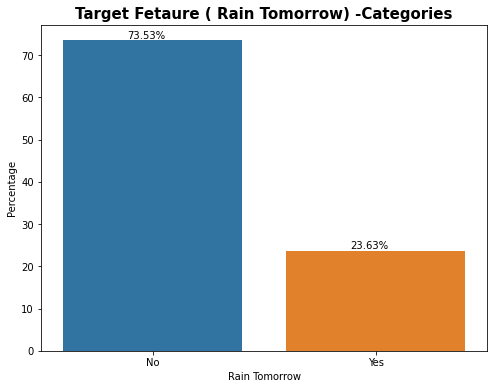

In [17]:
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')

In [18]:
#Date
df['Date'].nunique()

3004

In [19]:
# Location
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [20]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

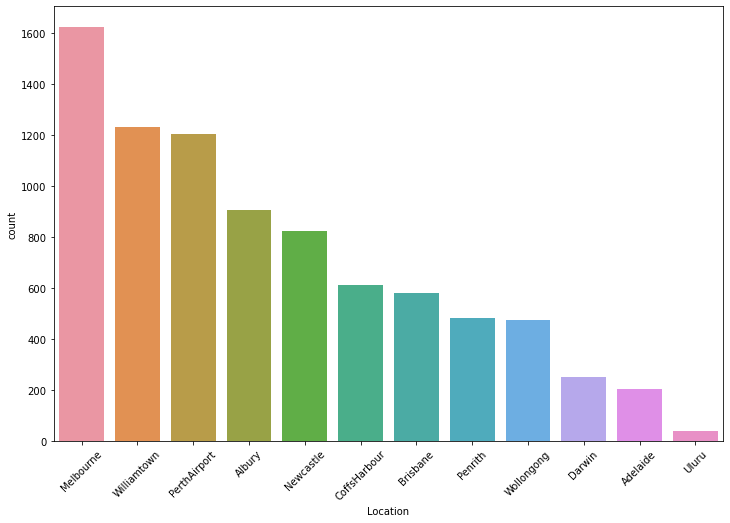

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

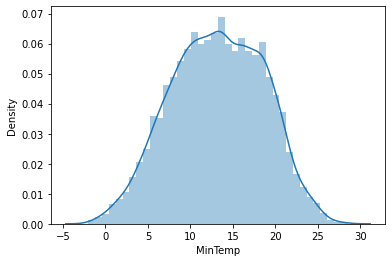

In [22]:
#Minimum Temperature
sns.distplot(df['MinTemp'])

The data is normally distributed.

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

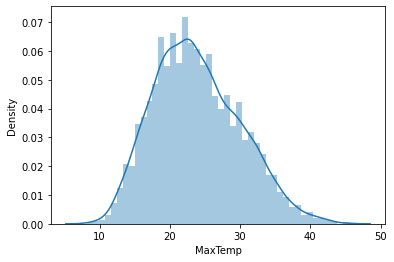

In [23]:
#Maximum Temperature
sns.distplot(df['MaxTemp'])

In [24]:
# Distribution of Continuous features
color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

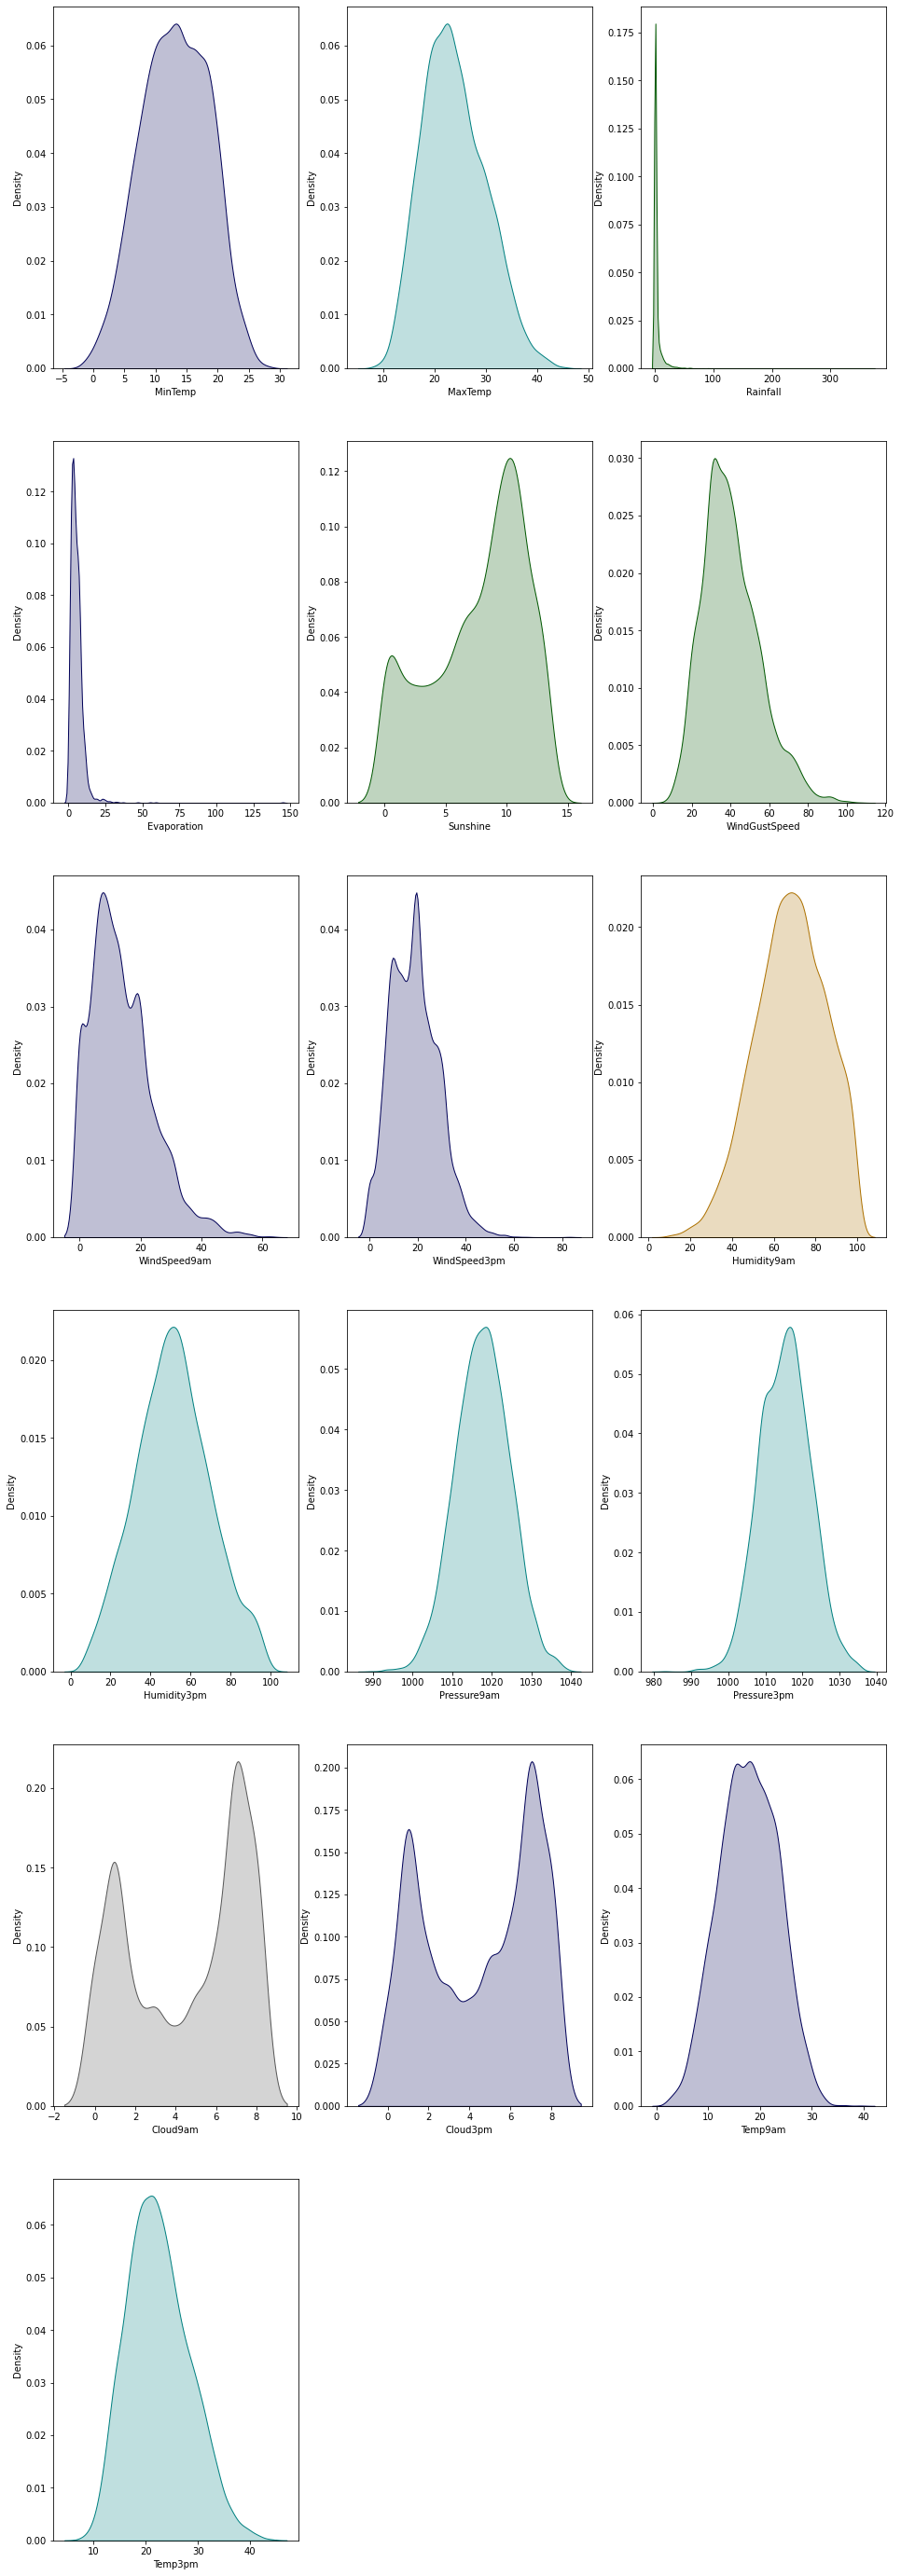

In [27]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

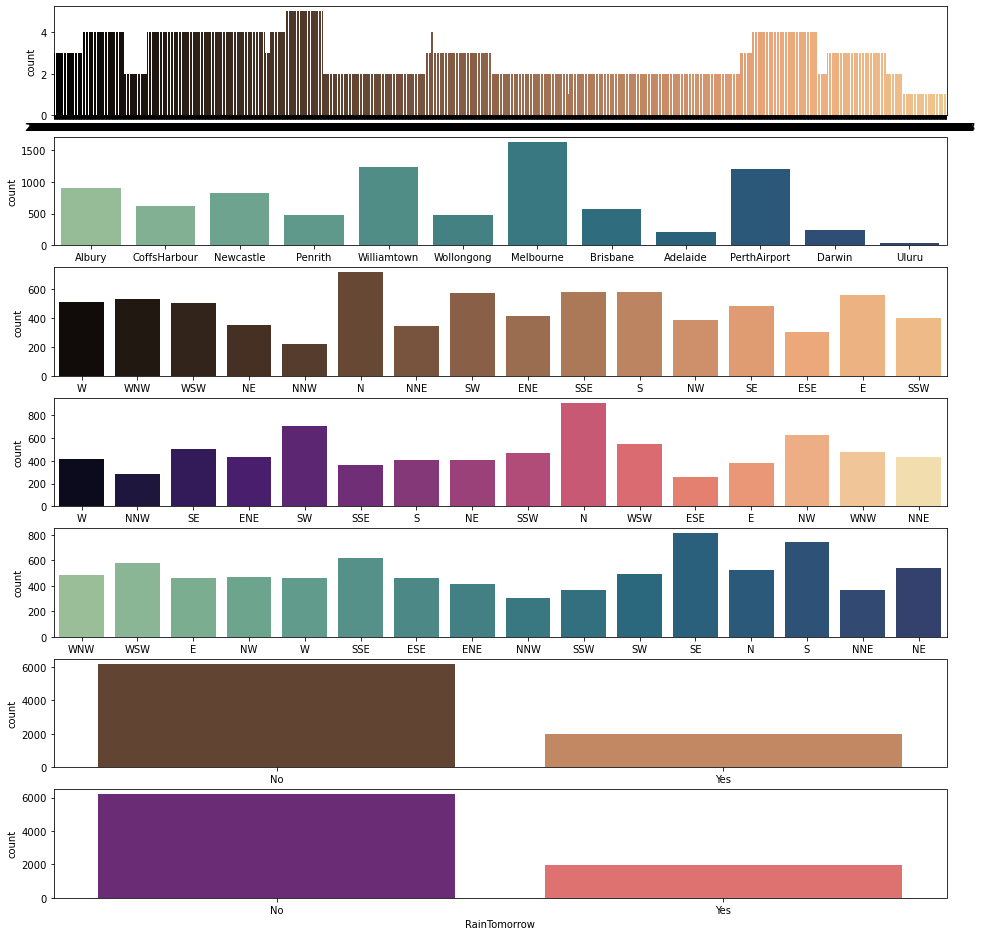

In [28]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Bivarient

In [29]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [30]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

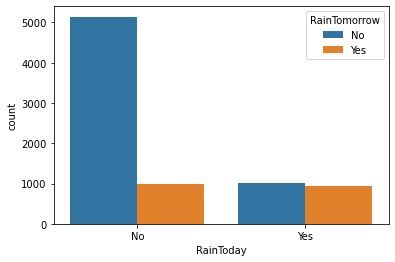

In [31]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

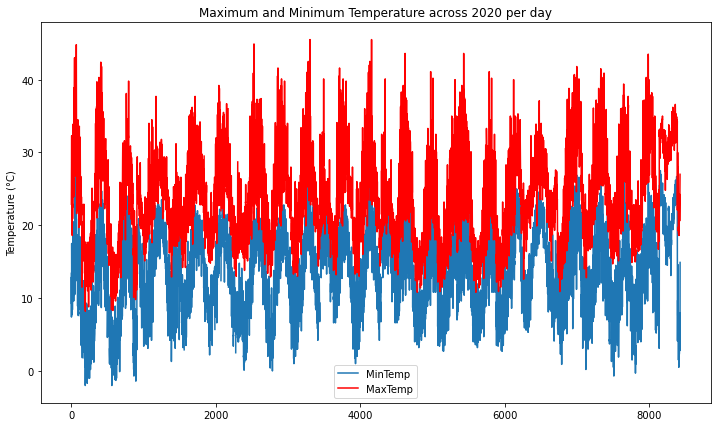

In [32]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

# Checking correlation

<AxesSubplot:>

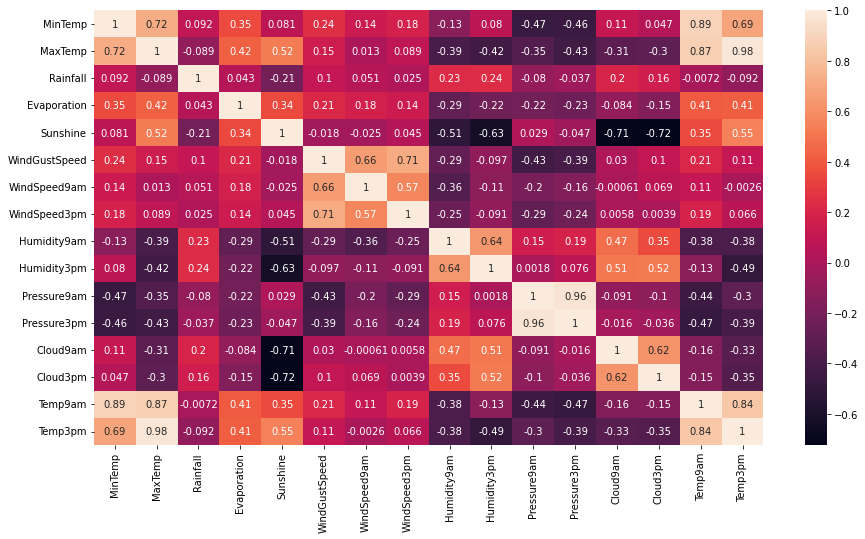

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Creating Model to predict will it Rain tomorrow or not

In [35]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [36]:
# seprate database on basis of RainTomorrow

yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [37]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

# Filling NAN/missing values

In [38]:
# For Temparatures replacing NaN with its respective mode value
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

In [39]:
# Replacing the NAN/missing values with median and mode
yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

In [40]:
df_new= yes_rain.append(no_rain, ignore_index=True)

In [41]:
df_new.shape

(8186, 23)

In [42]:
#Dropping columns
df_new.dropna(inplace=True)

In [43]:
df_new.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In the new dataset we can see that there is no null values

In [51]:
data= yes_rain.append(no_rain, ignore_index=True)

In [52]:
data.shape

(8186, 23)

In [53]:
data.dropna(inplace=True)

In [54]:
# Cnverting Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])

In [55]:
data['month']=data['Date'].dt.month

In [56]:
data['day']=data['Date'].dt.day

In [57]:
#After extracting data now we can drop date column
data.drop('Date',axis=1,inplace=True)

In [58]:
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'month',
 'day']

# Checking for outliers

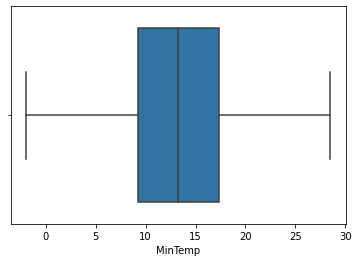

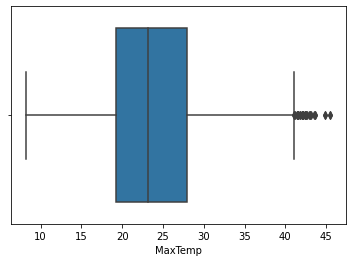

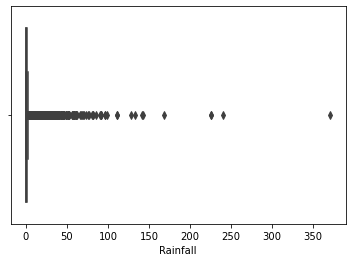

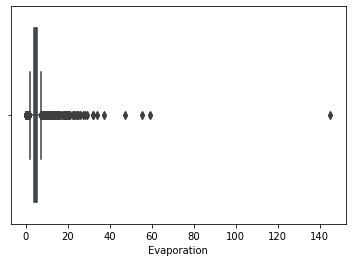

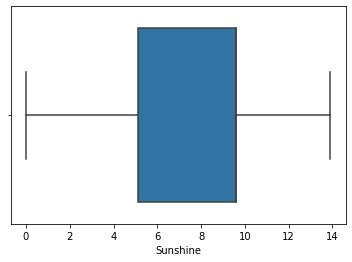

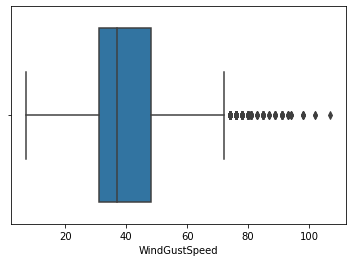

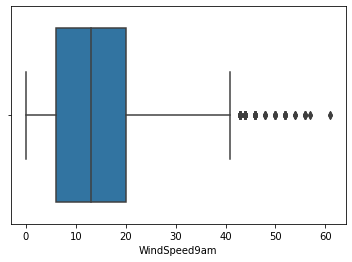

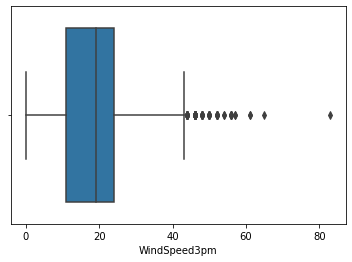

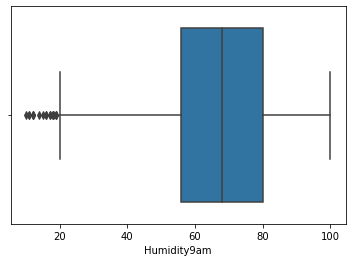

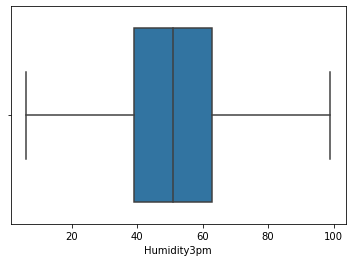

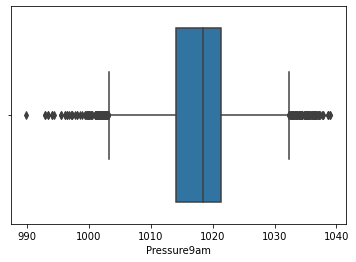

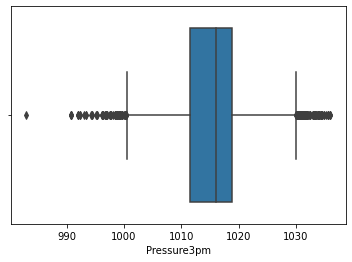

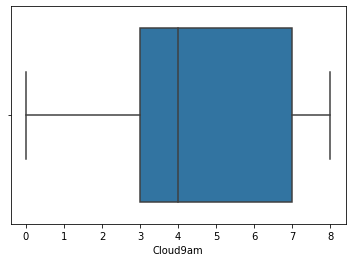

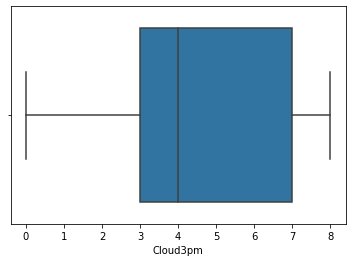

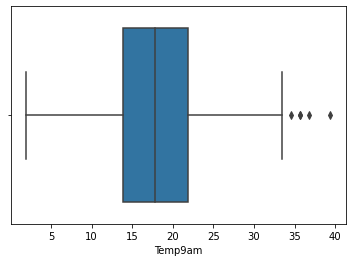

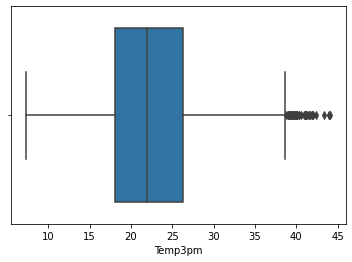

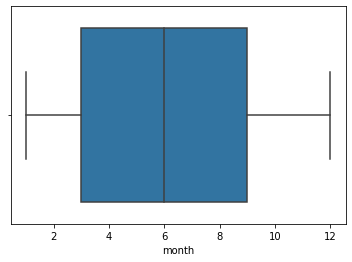

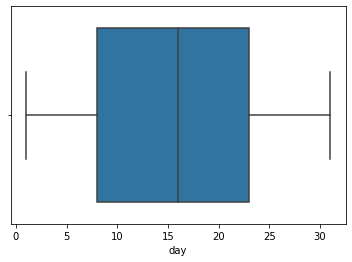

In [59]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

# Checking skewness

In [60]:
data[num].skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure9am      -0.028911
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
Temp9am          -0.009442
Temp3pm           0.403189
month             0.054225
day               0.000577
dtype: float64

In [63]:
#Removing skewness
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

In [65]:
data[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure9am     -0.005318
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
Temp9am         -0.016873
Temp3pm          0.362087
month            0.054225
day              0.000577
dtype: float64

Skewness removed

# Label Encoding

In [66]:
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)

In [67]:
X=data.drop('RainTomorrow',axis=1)
Y=data['RainTomorrow']

In [68]:
X.shape  , Y.shape

((8079, 23), (8079,))

In [71]:
X=pd.get_dummies(X,drop_first=True)

In [72]:
X.shape , Y.shape

((8079, 75), (8079,))

# SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [75]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.9025182778229082 on Random State = 61


# Creating train_test split

In [76]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=122,test_size=.3)

# Best Model Selection

In [77]:
# USing Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test, predrfc))
print('Confusion Matrix:',confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score: 0.967235310046033
Confusion Matrix: [[1751   66]
 [  55 1821]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1817
           1       0.97      0.97      0.97      1876

    accuracy                           0.97      3693
   macro avg       0.97      0.97      0.97      3693
weighted avg       0.97      0.97      0.97      3693



In [78]:
# Using Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test, predsvc))
print('Confusion Matrix:',confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

Accuracy Score: 0.7812076902247496
Confusion Matrix: [[1468  349]
 [ 459 1417]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1817
           1       0.80      0.76      0.78      1876

    accuracy                           0.78      3693
   macro avg       0.78      0.78      0.78      3693
weighted avg       0.78      0.78      0.78      3693



In [79]:
#Using Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.9493636609802328
Confusion Matrix: [[1717  100]
 [  87 1789]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1817
           1       0.95      0.95      0.95      1876

    accuracy                           0.95      3693
   macro avg       0.95      0.95      0.95      3693
weighted avg       0.95      0.95      0.95      3693



In [80]:
# USing KNN
knn=KNN()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8884375846195505
Confusion Matrix: [[1479  338]
 [  74 1802]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1817
           1       0.84      0.96      0.90      1876

    accuracy                           0.89      3693
   macro avg       0.90      0.89      0.89      3693
weighted avg       0.90      0.89      0.89      3693



# Cross Validation Score

In [81]:
# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rfc,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print('Support Vector Machine Classifier:',cross_val_score(svc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Decision Tree Classifier:',cross_val_score(DTC,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('KNN:',cross_val_score(knn,x,y,cv=5).mean())

Random Forest Classifier: 0.8732737611697805
Support Vector Machine Classifier: 0.7770105605199025
Decision Tree Classifier: 0.8118602761982128
KNN: 0.8520714865962631


# Hyper Parameter Tuning

In [85]:
parameters = {'criterion' : ['gini','entropy'],
              'max_features':['aoto','sqrt','log2'],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [86]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [87]:
GCV.fit(x_train,y_train)


KeyboardInterrupt



In [ ]:
GCV.best_params_

In [ ]:
Final_mod = RandomForestClassifier(criterion='gini', max_depth=20, max_features='log2', n_estimators=300, n_jobs=-2)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

# ROC AOC Curve

In [ ]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()